In [478]:
import numpy as np
from scipy import linalg as LA
import math
import matplotlib.pyplot as plt
from matplotlib import transforms
import pandas as pd

In [479]:
hand1 = pd.read_csv('hand1.dat', names = ['x', 'y'])
hand2 = pd.read_csv('hand2.dat', names = ['x', 'y'])
hand1.head(n=5)
a1 = hand1.values
a2 = hand2.values

## Problem 1

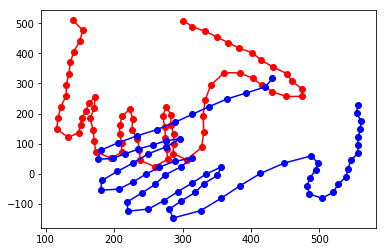

In [682]:
x1 = [i[0] for i in a1]
y1 = [i[1] for i in a1]
x2 = [i[0] for i in a2]
y2 = [i[1] for i in a2]
hand1 = plt.plot(x1, y1, color = "red", label = "hand1", marker='o')
hand2 = plt.plot(x2, y2, color = "blue", label = "hand2", marker = 'o')
plt.show()

m =
 [[7314972.67717427  345514.2986836 ]
 [6694258.16273607 1352442.26575311]] 

SVD
===

U =
 [[-0.73160166 -0.68173236]
 [-0.68173236  0.73160166]] 

S =
 [[9984690.92595978       0.        ]
 [      0.          759173.85558996]] 

V^T =
 [[-0.99305413 -0.11765837]
 [-0.11765837  0.99305413]] 

U S V^T =
 [[7314972.67717427  345514.2986836 ]
 [6694258.16273607 1352442.26575311]] 

Optimal rotation R = 
 [[ 0.80673157  0.59091807]
 [-0.59091807  0.80673157]] 

The angle of rotation between these two hands =  36.22218448325582 degrees.


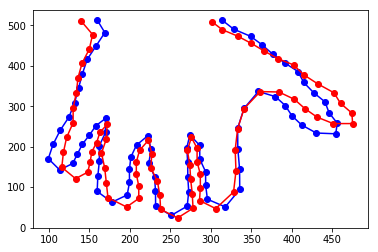

In [481]:
#creating matrix 
m = np.matmul(a1.transpose(), a2)

print("m =\n", m, "\n")

U, s, Vt = LA.svd(m)

S = LA.diagsvd(s, 2, 2)

R = Vt.dot(U)

angle = np.arccos(R[0][0])*180/np.pi

print("SVD\n===\n")
print("U =\n", U, "\n")
print("S =\n", S, "\n")
print("V^T =\n", Vt, "\n")
print("U S V^T =\n", U.dot(S.dot(Vt)), "\n")
print("Optimal rotation R = \n", R, "\n")
print("The angle of rotation between these two hands = ", angle, "degrees.")

rotated_a2 = np.matmul(a2,R)
rotated_a2
new_x2 = [i[0] for i in rotated_a2]
new_y2 = [i[1] for i in rotated_a2]
rotated_hand2 = plt.plot(new_x2, new_y2, color = "blue", label = "hand2", marker = 'o')
hand1 = plt.plot(x1, y1, color = "red", label = "hand1", marker='o')



## Problem 2

Problem 2a


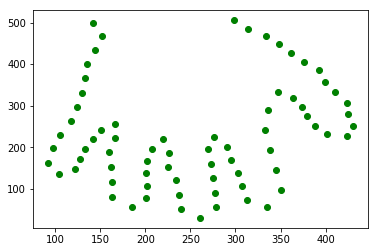

In [683]:

print("Problem 2a")
all_hands = pd.read_csv('all-hands.dat',names=np.arange(144))
means = all_hands.apply(np.mean, axis=0)
x_mean = [means.values[0::2]]
y_mean = [means.values[1::2]]
mean_hand = plt.plot(x_mean, y_mean, color = "green", label = "mean_hand", marker='o')

In [684]:
print("Problem 2b")
def center(m):
    cm = m.copy().astype("float64")
    means = np.array(sum(m)/len(m))[0]
    for row in range(len(m)):
        cm[row] = cm[row] - means
    return cm
    
        
centered_hands = center(np.matrix(all_hands))
cov = np.matmul(centered_hands.T,(centered_hands))/len(all_hands)
print("Covariance matrix of this data is: \n", cov)

Problem 2b
Covariance matrix of this data is: 
 [[518.54320988  -3.93209877 503.49382716 ...  43.         567.49382716
   40.91358025]
 [ -3.93209877  29.34876543  -5.13271605 ...  49.80555556  -6.99382716
   50.25308642]
 [503.49382716  -5.13271605 495.38580247 ...  33.25       547.63580247
   28.90123457]
 ...
 [ 43.          49.80555556  33.25       ... 149.80555556  35.72222222
  153.66666667]
 [567.49382716  -6.99382716 547.63580247 ...  35.72222222 629.91358025
   35.62345679]
 [ 40.91358025  50.25308642  28.90123457 ... 153.66666667  35.62345679
  159.61728395]]


In [685]:
total_var = sum(np.diagonal(cov))
print("Total variance: ", total_var)

Total variance:  45980.3425925926


In [686]:
print("Problem 2c")
cov12 = cov[0,2]
print("Covariance between x1 and x2: ", cov12)

Problem 2c
Covariance between x1 and x2:  503.4938271604938


In [687]:
cor12 = cov12/(np.std(all_hands[0:][0])*(np.std(all_hands[0:][2])))
print("Correlation between x1 and x2: ", cor12)
print("x1 and x2 are adjacent points on the hand, which explains why the correlation between these two features are strong - close to 1.")

Correlation between x1 and x2:  0.9934131321568845
x1 and x2 are adjacent points on the hand, which explains why the correlation between these two features are strong - close to 1.


In [688]:
print("Problem 2d")
eigval, eigvec = np.linalg.eig(cov.tolist())
print("eigenvalues: \n", eigval)


Problem 2d
eigenvalues: 
 [ 2.36314273e+04+0.00000000e+00j  7.64387390e+03+0.00000000e+00j
  5.45092827e+03+0.00000000e+00j  4.55262781e+03+0.00000000e+00j
  2.44440556e+03+0.00000000e+00j  1.30646754e+03+0.00000000e+00j
  3.87979997e+02+0.00000000e+00j  2.04646367e+02+0.00000000e+00j
  1.26125860e+02+0.00000000e+00j  7.99860439e+01+0.00000000e+00j
  4.59916211e+01+0.00000000e+00j  2.93553989e+01+0.00000000e+00j
  2.54492763e+01+0.00000000e+00j  1.83072243e+01+0.00000000e+00j
  1.58759529e+01+0.00000000e+00j  1.26739672e+01+0.00000000e+00j
  4.22054712e+00+0.00000000e+00j  7.53505961e-13+1.33564496e-12j
  7.53505961e-13-1.33564496e-12j -6.86106374e-13+1.31584880e-12j
 -6.86106374e-13-1.31584880e-12j  1.33062962e-12+4.66451789e-13j
  1.33062962e-12-4.66451789e-13j -1.32347385e-12+5.12450750e-13j
 -1.32347385e-12-5.12450750e-13j -3.03000755e-14+1.31153946e-12j
 -3.03000755e-14-1.31153946e-12j  9.32203543e-13+8.69621708e-13j
  9.32203543e-13-8.69621708e-13j -9.16866091e-13+7.44181377e-13j

In [689]:
print("eigenvectors: \n", eigvec)

eigenvectors: 
 [[-1.30919967e-01+0.j         -1.52227417e-02+0.j
  -1.13039657e-01+0.j         ... -1.00364869e-02-0.00731697j
  -2.12449991e-02+0.j         -9.67019579e-04+0.j        ]
 [ 3.81100414e-03+0.j          2.51789274e-02+0.j
  -2.46238541e-02+0.j         ... -1.71269341e-02-0.00993596j
   5.73062188e-03+0.j         -1.78895823e-02+0.j        ]
 [-1.27875381e-01+0.j          3.01057581e-03+0.j
  -1.17053620e-01+0.j         ...  3.99456197e-04-0.00372018j
  -4.62685229e-03+0.j          1.02456923e-02+0.j        ]
 ...
 [-1.99715697e-04+0.j          5.70217564e-02+0.j
  -4.27911655e-02+0.j         ...  1.10375319e-01+0.00711778j
   2.21966080e-01+0.j         -7.05031479e-02+0.j        ]
 [-1.45205206e-01+0.j         -3.14259705e-02+0.j
  -1.07297789e-01+0.j         ...  4.43578542e-02+0.05115054j
   1.08682138e-01+0.j          3.40209796e-02+0.j        ]
 [-1.18822245e-03+0.j          5.31874110e-02+0.j
  -3.27733057e-02+0.j         ...  9.68490043e-03+0.04961642j
   1.4042550

In [690]:
print("Problem 2e")
prob_var = []
for i in range(len(eigval)):
    prob_var.append(eigval[i]/np.sum(eigval))

Problem 2e


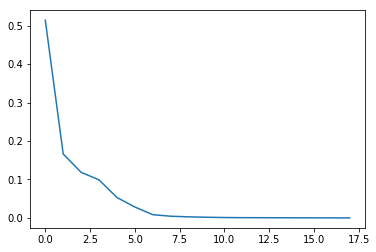

In [691]:
plt.plot(range(18), prob_var[:18])

In [692]:
v1 = np.sqrt(eigval[1])
v2 = np.sqrt(eigval[2])
v3 = np.sqrt(eigval[3])
e1 = eigvec[0]
e2 = eigvec[1]
e3 = eigvec[2]
s1= [-3*v1, -1.5*v1, 0, 1.5*v1, 3*v1]
s2= [-3*v2, -1.5*v2, 0, 1.5*v2, 3*v2]
s3= [-3*v3, -1.5*v3, 0, 1.5*v3, 3*v3]


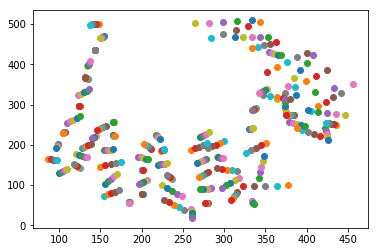

In [693]:
for i in range(len(s1)):
    added1 = all_hands.apply(np.mean, axis=0) + s1[i]*e1
    x_add1 = [added1.values[0::2]]
    y_add1 = [added1.values[1::2]]
    plt.plot(x_add1, y_add1, label = "sequence of hands1", marker='o')

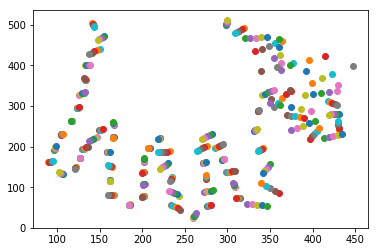

In [694]:
for i in range(len(s1)):
    added3 = all_hands.apply(np.mean, axis=0) + s2[i]*e2
    x_add2 = [added3.values[0::2]]
    y_add2 = [added3.values[1::2]]
    plt.plot(x_add2, y_add2, label = "sequence of hands2", marker='o')


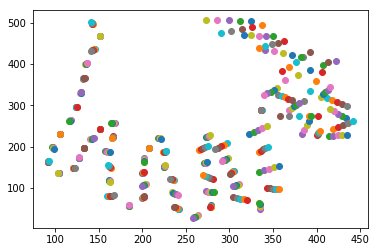

In [695]:
for i in range(len(s1)):
    added3 = all_hands.apply(np.mean, axis=0) + s3[i]*e3
    x_add3 = [added3.values[0::2]]
    y_add3 = [added3.values[1::2]]
    plt.plot(x_add3, y_add3, label = "sequence of hands3", marker="o")

In [696]:
print("Problem 2g)")
print("k = 5", (eigval[0]+eigval[1]+eigval[2]+eigval[3]+eigval[4])/sum(eigval))
print("Based on the calculation, we need at least 5 dimensions to represent 95% of the variance")

Problem 2g)
k = 5 (0.950912070934356+0j)
Based on the calculation, we need at least 5 dimensions to represent 95% of the variance


Problem 2h)


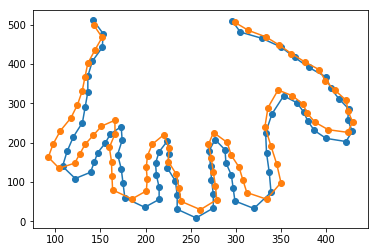

In [697]:
print("Problem 2h)")
first_hand = centered_hands[0]
first_x = np.array(all_hands)[0][0::2]
first_y = np.array(all_hands)[0][1::2]
plt.plot(first_x, first_y, label = "first_hand", marker='o')


means = all_hands.apply(np.mean, axis=0)
x_mean = [means.values[0::2]]
y_mean = [means.values[1::2]]
mh = np.array([means.values[0:]])[0]
vectors = [0]*144
for i in range(len(first_hand)):
    vectors += (first_hand.dot(eigvec[i]))*eigvec[i]
x_star = np.array(mh + vectors)[0]
proj_x = x_star[0::2]
proj_y = x_star[1::2]
plt.plot(proj_x, proj_y, label = "proj_hand", marker='o')

In [698]:
print("\n The reconstructed hand looks similar to the original hand. This is because 95% variance lies in the first 5 PCs that projecting onto these PCs help preserve most of the details.")
print("\n The weight vector is: \n", vectors)


 The reconstructed hand looks similar to the original hand. This is because 95% variance lies in the first 5 PCs that projecting onto these PCs help preserve most of the details.

 The weight vector is: 
 [[-3.98196380e-03+1.53543812j -4.63003525e-04+0.17853333j
  -3.43812965e-03+1.32573664j -2.25479886e-03+0.86944641j
  -2.30413793e-03+0.88847147j -7.49437809e-06+0.00288982j
  -1.69908752e-03+0.65516511j -8.60391922e-04+0.33176559j
   8.30898482e-04-0.32039297j -4.75721485e-04+0.18343735j
  -2.83210038e-03+1.09205284j -2.74427548e-03+1.05818772j
   1.71137659e-03-0.65990375j  4.46765629e-03-1.72272028j
   2.97171979e-03-1.14588984j  3.26509508e-03-1.25901483j
   5.30754454e-03-2.04657968j  8.38729861e-01-0.80211778j
  -8.34558226e-01-0.80645724j  1.69456481e-01-0.99179913j
  -1.64310026e-01-0.99266471j  5.07715123e-01+0.27861784j
  -5.09153404e-01+0.27598072j  3.81216307e-01-0.09423562j
  -3.80722406e-01-0.09621161j -3.74232898e-01+0.63444659j
   3.70937173e-01+0.63637909j  7.9309586